In [1]:
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
def plot_point(M, color, alpha=1):
    x = M[0, :]
    y = M[1, :]
    plt.plot(x, y, color=color, alpha=alpha)

In [4]:
def plot_segment(P1, P2, color):
    matP = np.concatenate(
        (P1, P2),
        1
    )
    plot_point2(matP, color)

In [5]:
def mat_rotation(theta):
    mat = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    return mat

In [6]:
def plot_quadratic_bezier(M, color):
    n=50
    mt = np.linspace(0,1.,n)
    matt = np.ones((3,n))
    matt[1,:] = mt
    matt[2,:] = mt*mt

    matBezier3 = np.array([
        [1, 0, 0],
        [-2, 2, 0],
        [1, -2, 1]
    ])
    
    matPointligne = np.dot(np.dot(matt.T,matBezier3), M.T)
    
    matPoint = matPointligne.T

    plot_point2(matPoint, color)
    
    return matPoint

In [7]:
def plot_cubic_bezier(M, color, alpha=1):
    n=50
    mt = np.linspace(0,1.,n)  
    matt = np.ones((4,n))
    matt[1,:] = mt
    matt[2,:] = mt*mt
    matt[3,:] = mt*mt*mt
    
    matBezier4 = np.array([
            [1, 0, 0, 0],
            [-3, 3, 0, 0],
            [3, -6, 3, 0],
            [-1, 3, -3, 1]
        ])
    
    matPointligne = np.dot(np.dot(matt.T,matBezier4), M.T)
    matPoint = matPointligne.T

    plot_point(M, "black", alpha=0.)
    plot_point(M, "green", alpha=0.)
    plot_point(matPoint, color, alpha=alpha)

# UMBRELLA CORP

In [31]:
def plot_point2(M, color):
    x = M[0, :]
    y = M[1, :]
    plt.plot(x, y, color=color, linewidth=8)

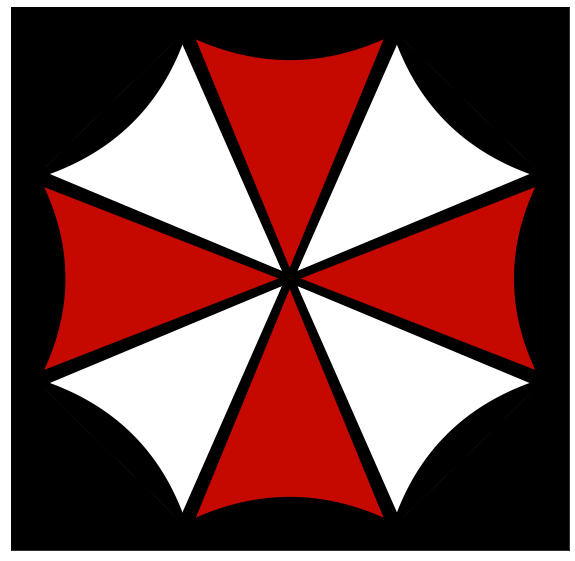

In [32]:
plt.figure(figsize=(10, 10))
plt.axes().set_facecolor("black")
plt.xticks([])
plt.yticks([])

m = np.array([
        [-2, -5],
        [0, -4],
        [2, -5]
])

#plot_segment(np.array([m[0]]).T, np.array([[0, 0]]).T, "-r")
#plot_segment(np.array([m[2]]).T, np.array([[0, 0]]).T, "-r")

for i in range(8):
    if i % 2 == 0:
        rotated_m = np.dot(mat_rotation(np.radians(45 * i)), m.T)
        res = plot_quadratic_bezier(rotated_m, "k")
        plot_segment(np.array([rotated_m.T[0]]).T, np.array([[0, 0]]).T, "k")
        plot_segment(np.array([rotated_m.T[2]]).T, np.array([[0, 0]]).T, "k")

        plt.fill(
            [rotated_m[0][0], 0, rotated_m[0][2]],
            [rotated_m[1][0], 0, rotated_m[1][2]],
            "#c50900"
        )
        plt.fill(res[0], res[1], color="k")
    else:
        rotated_m = np.dot(mat_rotation(np.radians(45 * i)), m.T)
        res = plot_quadratic_bezier(rotated_m, "k")
        plot_segment(np.array([rotated_m.T[0]]).T, np.array([[0, 0]]).T, "k")
        plot_segment(np.array([rotated_m.T[2]]).T, np.array([[0, 0]]).T, "k")

        plt.fill(
            [rotated_m[0][0], 0, rotated_m[0][2]],
            [rotated_m[1][0], 0, rotated_m[1][2]],
            "white"
        )
        plt.fill(res[0], res[1], color="k")

plt.savefig("img.png")

In [81]:
%ls

Logo.ipynb    Projet.ipynb  TP02.ipynb    TP04.ipynb
PROJET.md     TP01.ipynb    TP03.ipynb    img.png


In [51]:
plt.close()

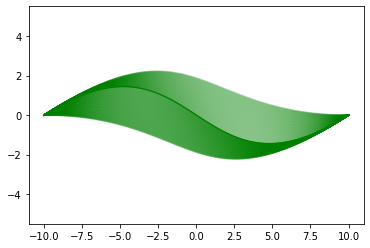

In [7]:
mat4P1 = np.array([
    [-10, 0],
    [0, 5],
    [0, -5],
    [10, 0],
])
plot_cubic_bezier(mat4P1.T, "g")

for i in np.arange(0, 5, 0.1):
    mat4P1 = np.array([
        [-10, 0],
        [0, i],
        [0, -5],
        [10, 0],
    ])
    plot_cubic_bezier(mat4P1.T, "g", 0.5)

for i in np.arange(0, 5, 0.1):
    mat4P1 = np.array([
        [-10, 0],
        [0, 5],
        [0, -i],
        [10, 0],
    ])
    plot_cubic_bezier(mat4P1.T, "g", 0.3)
    
plt.show()

## Rotation

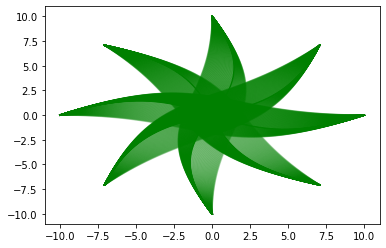

In [8]:
for angle in range(180, 360, 45):
    mat4P1 = np.array([
        [-10, 0],
        [0, 5],
        [0, -5],
        [10, 0],
    ])
    plot_cubic_bezier(np.dot(mat_rotation(np.radians(angle)), mat4P1.T), "green")

    for i in np.arange(0, 5, 0.1):
        mat4P1 = np.array([
            [-10, 0],
            [0, i],
            [0, -5],
            [10, 0],
        ])
        plot_cubic_bezier(np.dot(mat_rotation(np.radians(angle)), mat4P1.T), "green", 0.5)

    for i in np.arange(0, 5, 0.1):
        mat4P1 = np.array([
            [-10, 0],
            [0, 5],
            [0, -i],
            [10, 0],
        ])
        plot_cubic_bezier(np.dot(mat_rotation(np.radians(angle)), mat4P1.T), "green", 0.3)


plt.show()

## Fleur

In [47]:
def plot_fleur(petales, largeur=5, color="green"):
    plt.figure(figsize=(10, 10))
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)
    
    colors = ["red", "darkred", "maroon", "salmon", "tomato"]
        
    for angle in range(petales):
        mat4P1 = np.array([
            [-10, 0],
            [0, 5],
            [0, -5],
            [10, 0],
        ])
        plot_cubic_bezier(np.dot(mat_rotation(angle * ((2 * np.pi) / petales)), mat4P1.T), color, 0.5)

        """
        for i in np.arange(0, largeur, 0.1):
            mat4P1 = np.array([
                [-10, 0],
                [0, i],
                [0, -5],
                [10, 0],
            ])
            plot_cubic_bezier(np.dot(mat_rotation(angle * ((2 * np.pi) / petales)), mat4P1.T), color, 0.3)

        for i in np.arange(0, largeur, 0.1):
            mat4P1 = np.array([
                [-10, 0],
                [0, 5],
                [0, -i],
                [10, 0],
            ])
            plot_cubic_bezier(np.dot(mat_rotation(angle * ((2 * np.pi) / petales)), mat4P1.T), color, 0.1)
        
        """

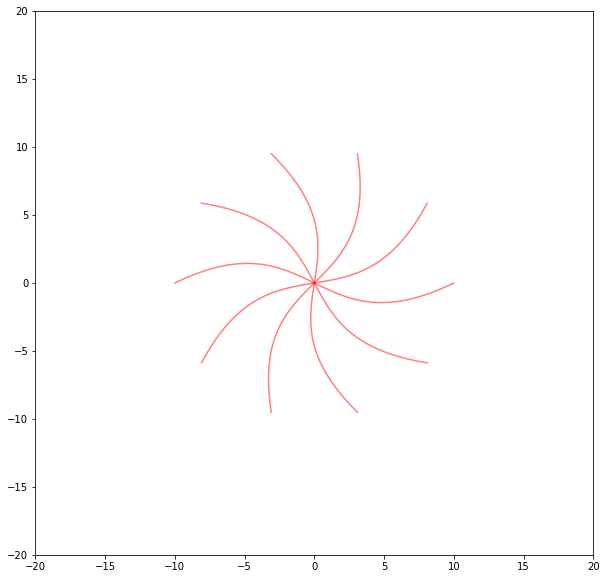

In [48]:
plot_fleur(5, 5, "red")
plt.show()

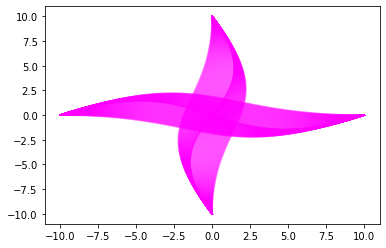

In [11]:
plot_fleur(4, 5, "fuchsia")
plt.show()

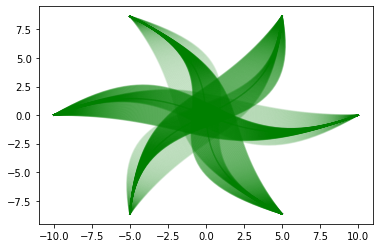

In [12]:
plot_fleur(3, 8, "green")
plt.show()